# Xe & XeF2 comparisons
12/02/21

Comparison of Xe & XeF2 data + experiments. No SO treatment herein.

Basic conclusions: atomic Xe parameters (cross-sections and $\beta$) look broadly similar to XeF2 results, except:

- Much broader feature in the XS.
- No additional structures in the $\beta$s, i.e. it's much smoother, for the atomic case. This confirms that the structures in the molecular case are 'real' molecular features (at least as far as the fixed-nuclei, single-electron calculations go), but whether they persist in realtiy and are experimentally observable is a good question.

For XeF2 only plus SO treatment, see [previous notebook XeF2_ePS-expt_comp_271020_4d_v111120-dist.html](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_271020_4d_v111120-dist.html).

## Setup

In [1]:
!hostname

Stimpy


In [2]:
!conda env list

# conda environments:
#
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D-yt
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSpkgTest2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\fibre-sim
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ipykernel_py2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pkgTest
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pypi-test
                        

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

import matplotlib.pyplot as plt

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
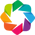

In [5]:
hvPlotters.setPlotters(width = 1000)
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

## Load data

In [6]:
# # Scan for subdirs, based on existing routine in getFiles()

# fileBase = r'D:\projects\ePolyScat\xef2\XeF2_highRes_wf'  # Data dir on Stimpy
# fileBase = r'D:\VMs\Share\ePSshare\xe\Xe_wf'  # Data dir on Stimpy
# jobDirs = [r'D:\VMs\Share\ePSshare\xe\Xe_wf\orb19_4d']  # Check OK for single dir specified method

# Set explicit list of dirs
jobDirs = [r'D:\VMs\Share\ePSshare\xe\Xe_wf\orb19_4d', r'D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb21_A1G',
          r'D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb22_E1G', r'D:\projects\ePolyScat\xef2\XeF2_highRes_wf\orb24_E2G']

In [7]:
data = ePSmultiJob(jobDirs = jobDirs, verbose = 0)

In [8]:
# keys = [4,5,6]  # Set for 4d data only
# data.scanFiles(keys = keys)

data.scanFiles()  # All files
data.jobsSummary()

*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warning: Missing records, expected 80, found 60.
*** Warning: Found 20 blank sets of matrix elements, symmetries ['HU']
*** Warn

(Note: for the atomic case, there is an HU continuum symmetry allowed, but the matrix elements are, effectively, zero - this triggers the warning above.)

In [9]:
# Change label for atomic case!
data.data['orb19']['jobNotes']['orbLabel'] = 'Xe atomic 4d, S/Ag'

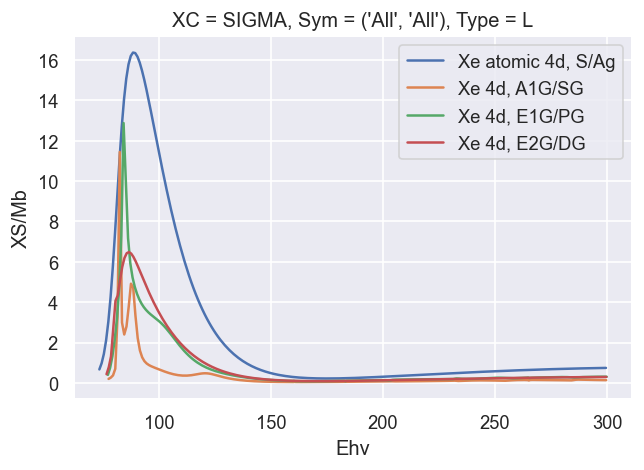

In [10]:
# Comparitive plot over datasets (all symmetries only)
Etype = 'Ehv'  # Set for Eke or Ehv energy scale
Erange=[50, 300]  # Plot range (full range if not passed to function below)
data.plotGetCroComp(pType='SIGMA', Etype = Etype, Erange = Erange)
# data.plotGetCroComp(pType='SIGMA', Etype = Etype)

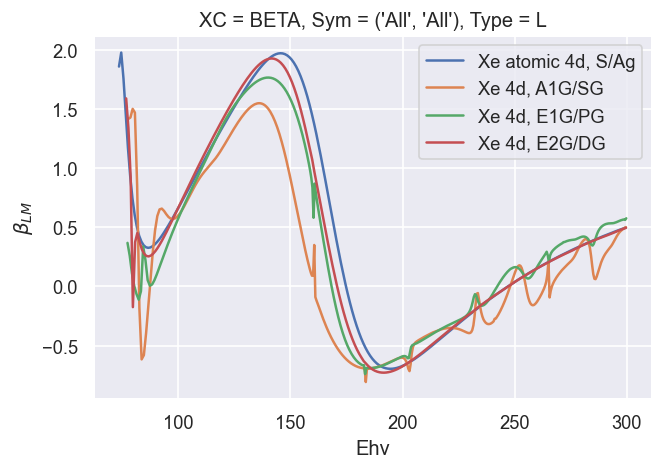

In [11]:
# Comparative plot over datasets (all symmetries only)
data.plotGetCroComp(pType='BETA', Etype=Etype, Erange=Erange)

## Experimental data
- Set 1: RF processed results, 02/10/20
- Set 2: DH ion yields, 27/10/20

In [12]:
# Load experimental data
dataPathExpt = Path(r'D:\projects\XeF2_Soleil_2019\RF_data_analysis_021020')

# Set data attribs in dict similar to ePS results structure
dataFiles = {}
dataFiles['SIGMA'] = {'Data':'XS', 'File':r'XeF2_Xe4d_4d32_4d52_cross_sec_all_photon_energies_02102020.dat', 
                      'States':['$4d_{3/2}$', '$4d_{5/2}$']}
dataFiles['BETA'] = {'Data':'Beta', 'File':r'XeF2_Xe4d_beta_all_photon_energies_02102020.dat', 
                     'States':['$\Pi_{1/2} (4d_{3/2})$', '$\Delta_{3/2} (4d_{3/2})$', '$\Sigma_{1/2} (4d_{5/2})$', 
                               '$\Pi_{3/2} (4d_{5/2})$', '$\Delta_{5/2} (4d_{5/2})$']}

dataFiles['BR-All'] = {'Data':'Branching ratios', 'File':r'XeF2_Xe4d_branching_all_photon_energies_all_states_01112020.dat', 
                      'States':['$\Pi_{1/2} (4d_{3/2})$', '$\Delta_{3/2} (4d_{3/2})$', '$\Sigma_{1/2} (4d_{5/2})$', 
                               '$\Pi_{3/2} (4d_{5/2})$', '$\Delta_{5/2} (4d_{5/2})$']}
dataFiles['BR-SO-summed'] = {'Data':'Branching ratios SO summed', 'File':r'XeF2_Xe4d_branching_all_photon_energies_SO_av_01112020.dat', 
                     'States':['$\Pi$', '$\Delta$', '$\Sigma$']}

# Update with ion data
dataFiles2 = {}
dataFiles2['ION-low'] = {'Data':'XS', 'File':r'XeF2_ion_yield_low_energy_cal.txt'}
dataFiles2['ION-high'] = {'Data':'XS', 'File':r'XeF2_ion_yield_high_energy_cal.txt'}
                         
# Update with branching ratios
# dataFilesBR = {}
# dataFilesBR['All'] = {'Data':'Branching ratios', 'File':r'XeF2_Xe4d_branching_all_photon_energies_all_states_01112020.dat', 
#                       'States':['\pi1/2 (4d3/2)', '\delta3/2 (4d3/2)', '\sigma1/2 (4d5/2)', '\pi3/2 (4d5/2)', '\delta5/2 (4d5/2)']}
# dataFiles['SO-summed'] = {'Data':'Branching ratios SO summed', 'File':r'XeF2_Xe4d_branching_all_photon_energies_SO_av_01112020.dat', 
#                      'States':['\pi', '\delta', '\sigma']}


In [13]:
# Read data files and convert to Xarray
# 27/10/20 added quick hack to set 2nd array for ion yield data
dataList = []
dataList2 = []
for key in dataFiles:
    dataIn = np.loadtxt(dataPathExpt/dataFiles[key]['File'])
    
    # Convert to Xarray
    dataXr = xr.DataArray(dataIn[:,1:], dims=('Ehv','State'), coords={'Ehv':dataIn[:,0], 'State':dataFiles[key]['States'][0:dataIn.shape[1]-1]})
    dataXr.attrs = dataFiles[key]
    dataXr.attrs['dataPath'] = dataPathExpt
    dataXr.name = key
    dataList.append(dataXr)

# Stack to Xarray
dataExpt = xr.concat(dataList, "XC")
dataExpt['XC'] = list(dataFiles.keys())

for key in dataFiles2:
    dataIn = np.loadtxt(dataPathExpt/dataFiles2[key]['File'])
    
    # Convert to Xarray
    dataXr = xr.DataArray(dataIn[:,1].squeeze(), dims=('Ehv'), coords={'Ehv':dataIn[:,0]})  # Only 1D datasets in this case
    dataXr.attrs = dataFiles2[key]
    dataXr.attrs['dataPath'] = dataPathExpt
    dataXr.name = key
    dataList2.append(dataXr)

dataExpt2 = xr.concat(dataList2, "XC")
dataExpt2['XC'] = list(dataFiles2.keys())

## Comparison plots...

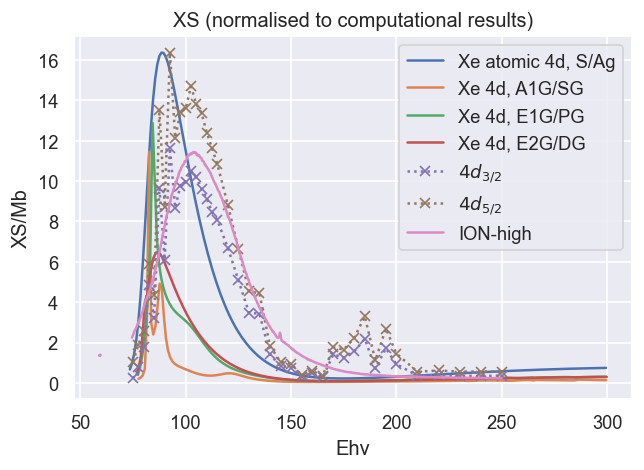

In [14]:
# Compare with computational results
marker = 'x'
pType = 'SIGMA'
Erange = [50, 300]
pltObj, lTextComp = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)
lText = lTextComp.copy()

# Add expt data - cross-secions
scale = dataExpt.sel({'XC':pType}).max() / data.dataSets['orb19']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
(dataExpt.sel({'XC':pType})/scale).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Add expt data - ion yields
ionData = 'ION-high'
scale = dataExpt2.sel({'XC':ionData}).max() / data.dataSets['orb21']['XS'].sel({'XC':pType, 'Type':'L'}).max()  # Set scaling to match computational data
(dataExpt2.sel({'XC':ionData})/scale).plot.line(x='Ehv');

# Manual legend fix
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
lText.extend([ionData])
plt.legend(lText)

# Fix axis labels
if pType == 'SIGMA':
    plt.ylabel('XS/Mb')
    plt.title('XS (normalised to computational results)')
else:
    plt.ylabel(r"$\beta_{LM}$")
    plt.title(r"$\beta_{LM}$")

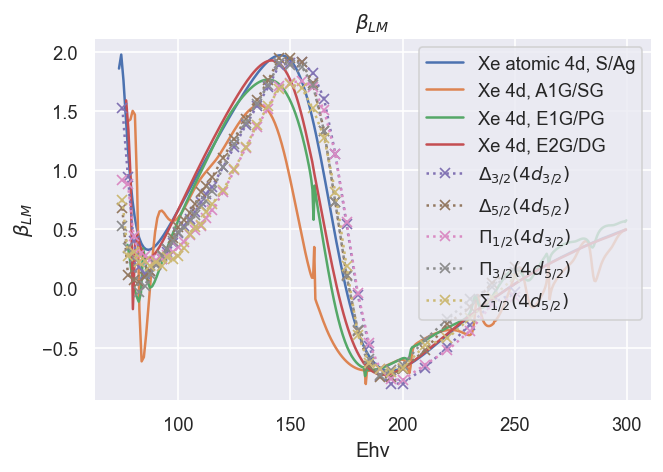

In [15]:
# Beta comparison plot over orbs
pType = 'BETA'
pltObj, lText = data.plotGetCroComp(pType=pType, Etype = Etype, Erange = Erange, returnHandles = True)

# Add expt data
dataExpt.sel({'XC':pType}).dropna('State').plot.line(x='Ehv', marker=marker, ls=':');

# Manual legend fix
lText.extend(dataExpt.sel({'XC':pType}).dropna('State').coords['State'].data)
plt.legend(lText, loc='upper right')

# Fix axis labels
if pType == 'SIGMA':
    plt.ylabel('XS/Mb')
    plt.title('XS (normalised to computational results)')
else:
    plt.ylabel(r"$\beta_{LM}$")
    plt.title(r"$\beta_{LM}$")

## Full info dump

### XS and $\beta$ per orbital & symmetry

Interactive^ plots per orbital & symmetry. In these plots the solid lines show the 'mixed' gauge results, and dashed lines show length and velocity gauges as bounds on the values.

^ Use controls in top right of plot. Also data sets can be turned on/off using the legend entries.

Note that Xe atomic case is the first plot below, ignore the out-of-bounds $\beta$s for (null) HU symmetry case, these are artefacts. Also of note in this case is that the individual symmetry channels show very little variation with energy, hence most of the overall (symmetry-summed) structure is form intra-channel effects (interferences).

In [16]:
# XC & Betas
data.plotGetCro(pType='SIGMA', Etype = Etype, Erange = Erange, backend = 'hv') 


*** 4d, S/Ag


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** Xe 4d, A1G/SG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** Xe 4d, E1G/PG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** Xe 4d, E2G/DG


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)

### Matrix elements

As previously for XeF2 case; for atomic Xe there are 5 degenerate channels (4d components) labelled by 'it'.

Plotting data Xe_wf.orb19_4d_E1.0_15.0_286.0eV.inp.out, pType=a, thres=0.1, with Seaborn
Plotting data XeF2_highRes_wf.orb21_A1G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn
Plotting data XeF2_highRes_wf.orb22_E1G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn
Plotting data XeF2_highRes_wf.orb24_E2G_E1.0_10.0_141.0eV.inp.out, pType=a, thres=0.1, with Seaborn


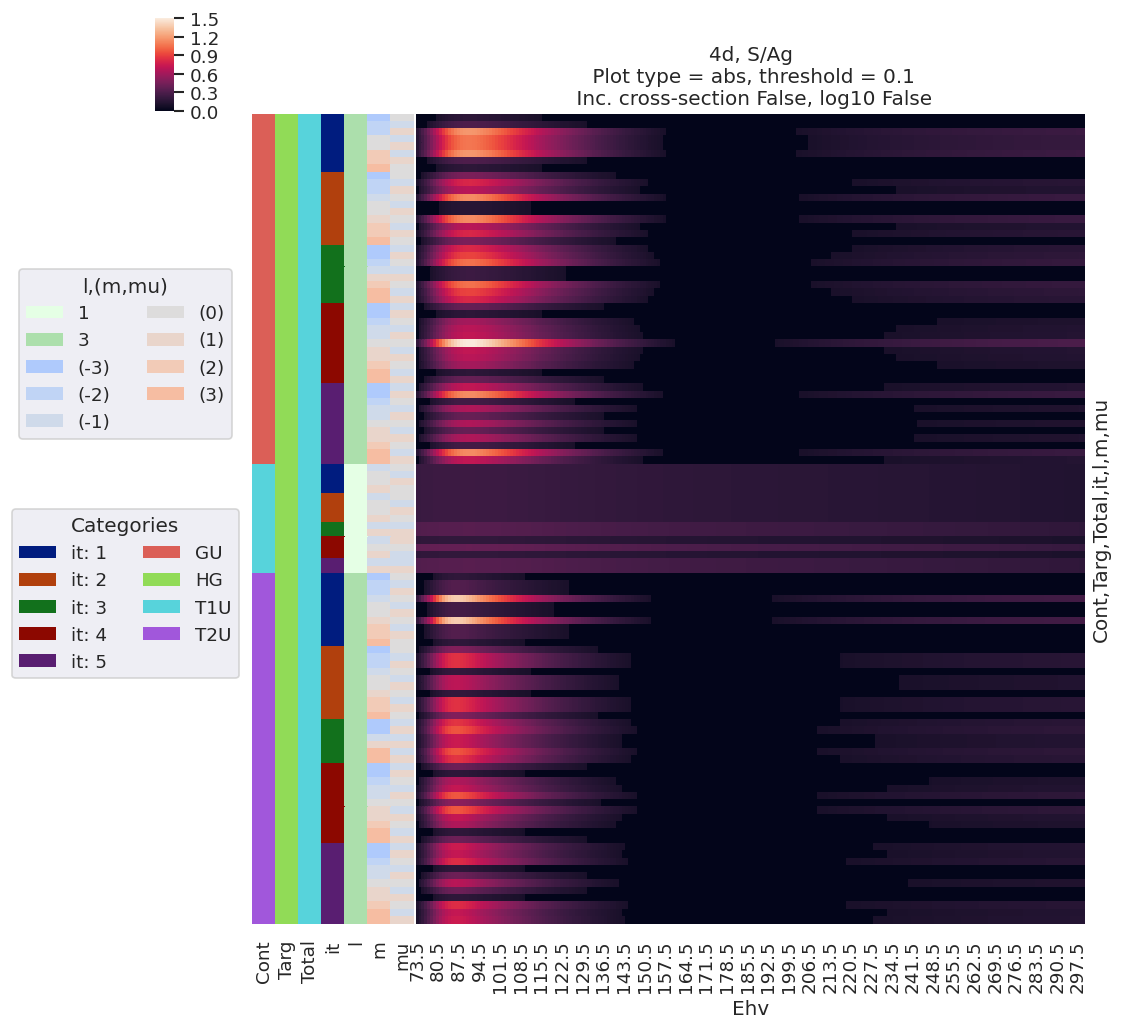

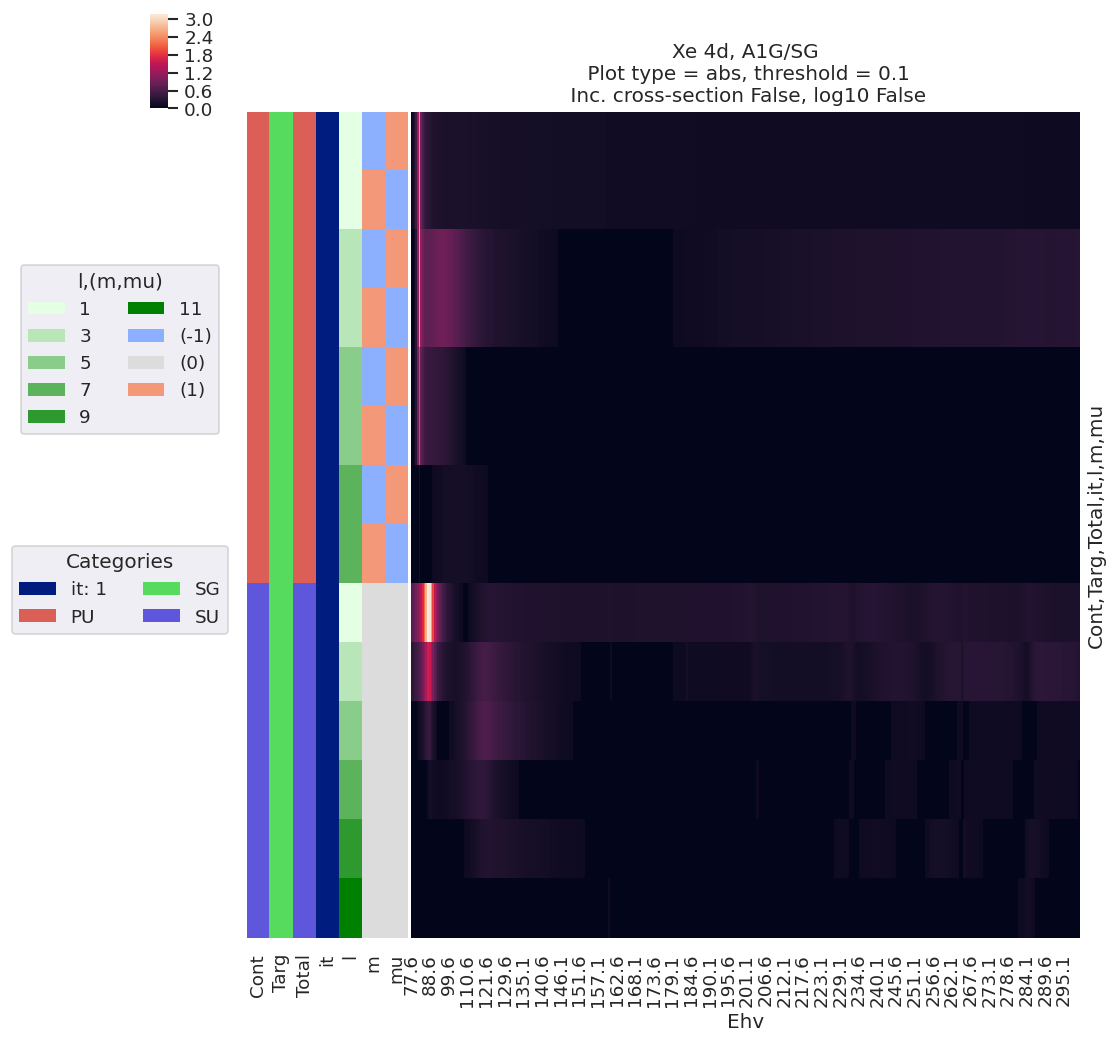

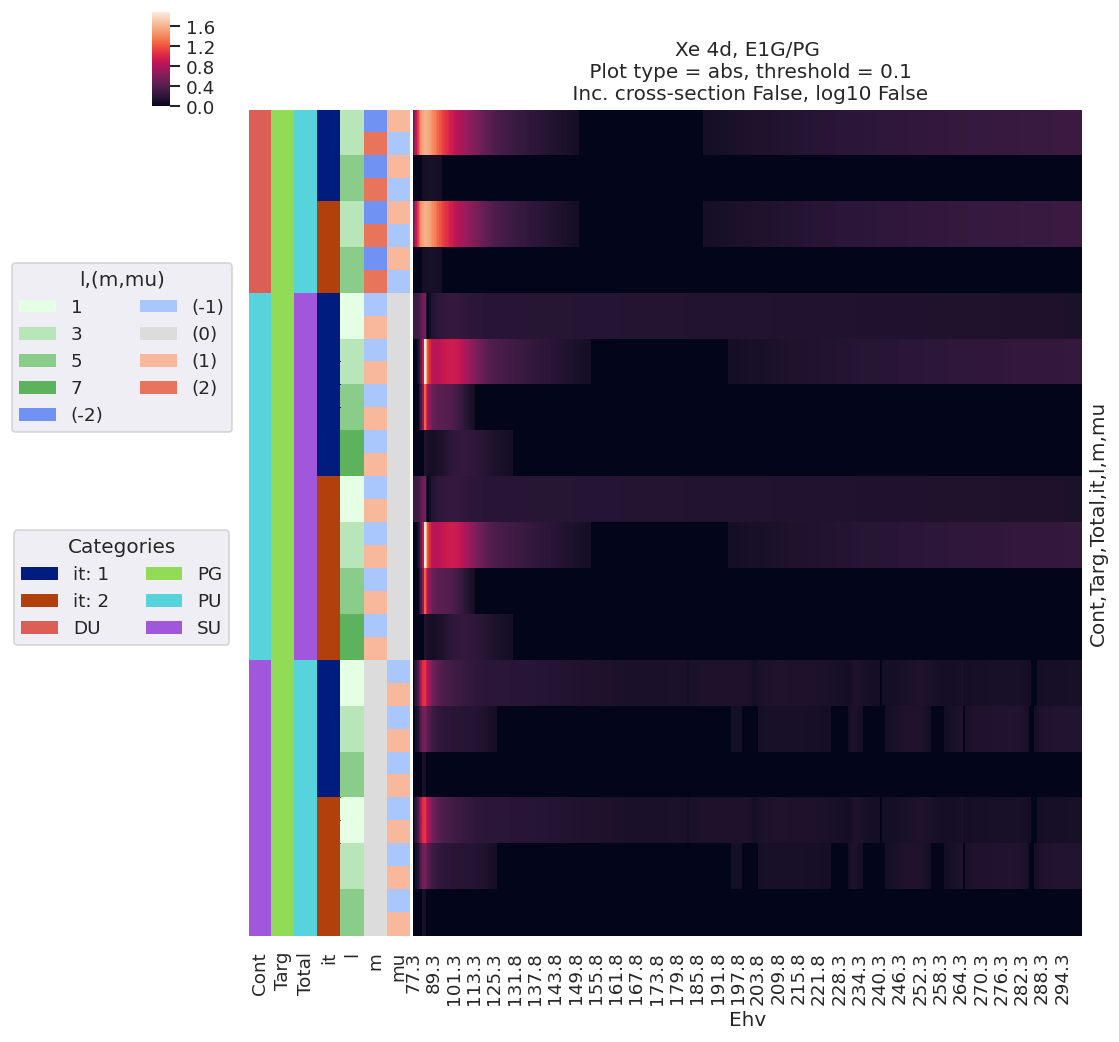

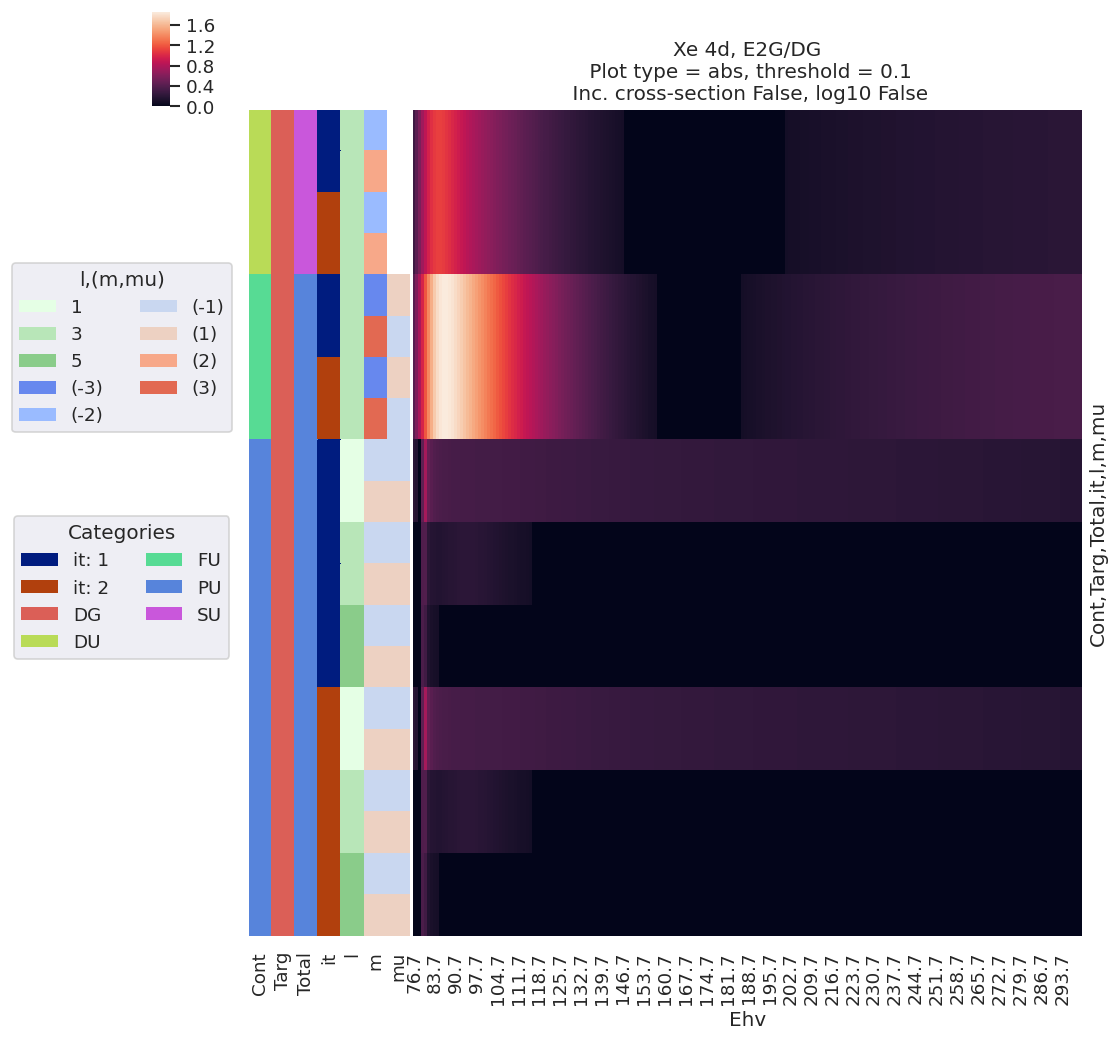

In [24]:
data.lmPlot(dataType = 'matE', Erange = Erange, Etype = Etype, thres = 0.1, logFlag = False, selDims = {'Type':'L'}, fillna = True)

## Versions

In [359]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Wed Nov 11 18:06:14 2020 Eastern Standard Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------